# Project Mod 1

```Minna Fingerhood
Matthew Wasserman
Cristina Mulas```


In [1]:
import warnings
warnings.filterwarnings("ignore")
from final_functions import *

In [2]:
df = read_dataframe('kc_house_data.csv')

In [3]:
df[df.id.duplicated(keep=False)].head()
#duplicates are a result of the same house being sold another time... 
#Therefore do not need to delete

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


In [4]:
#function for clean_data
df = clean_data(df) #cleans our data

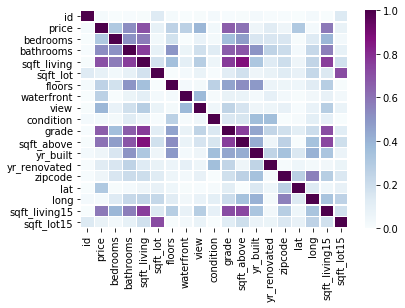

In [5]:
#test for colinearity
sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidths=.5)

In [6]:
df.corr()[abs(df.corr()>.75)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,NaN,NaN,NaN,0.756402,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


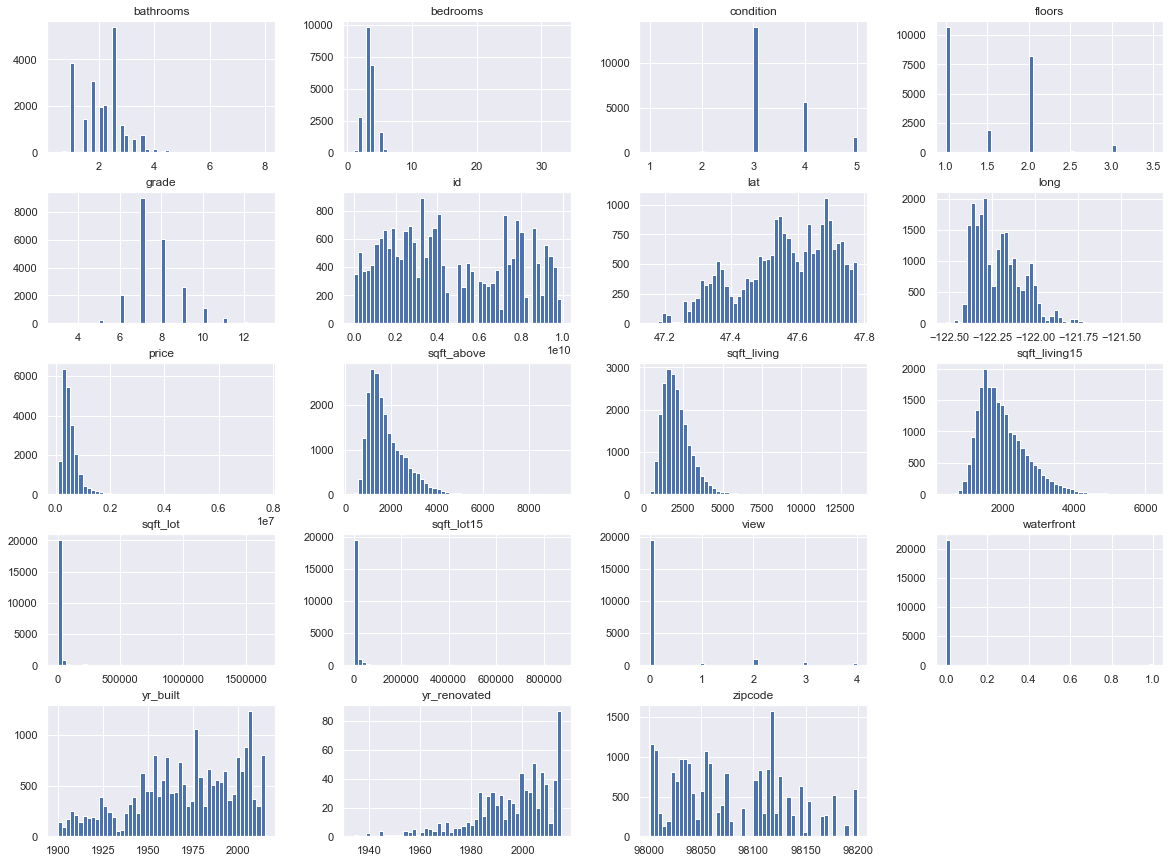

In [7]:
#show distributions before transformation
sns.set()
fig = histogram(df)

In [8]:
# Normalization 
c = ['price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
df = log_transform(df, c)



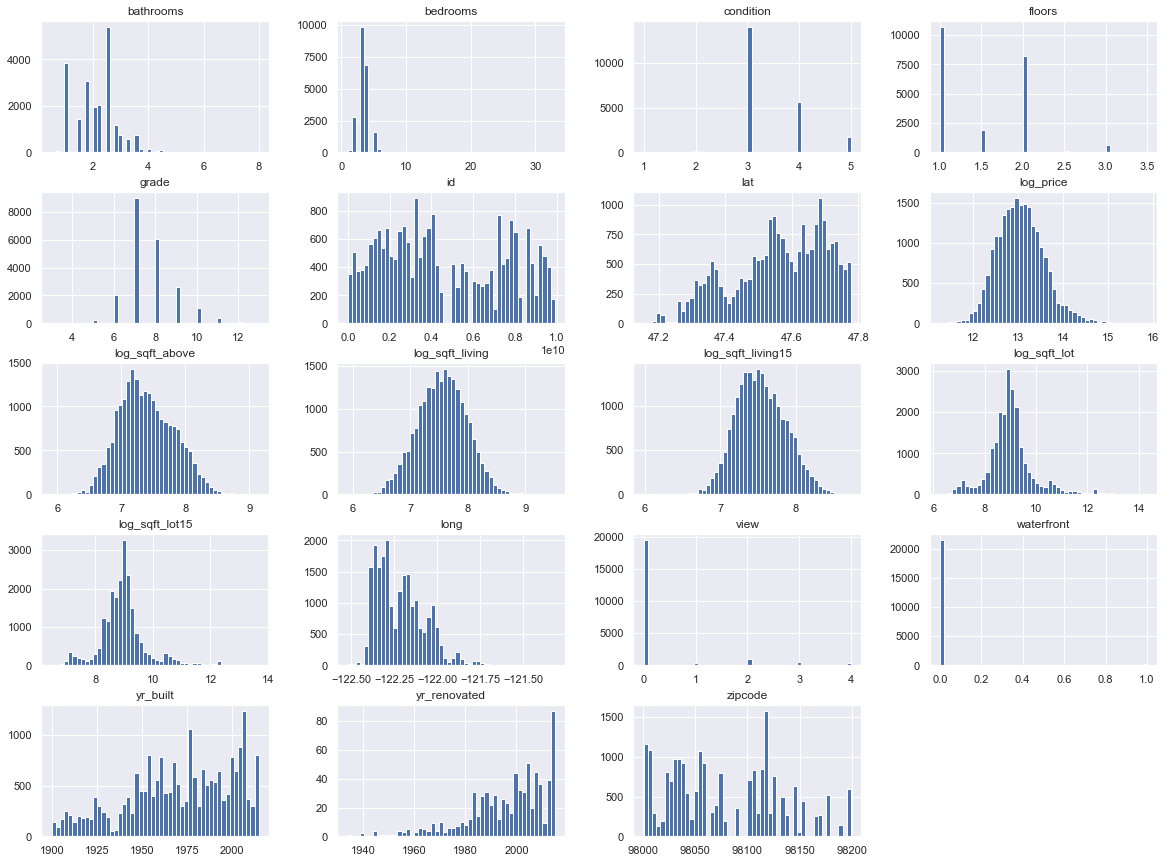

In [9]:
sns.set()
fig = histogram(df)


0

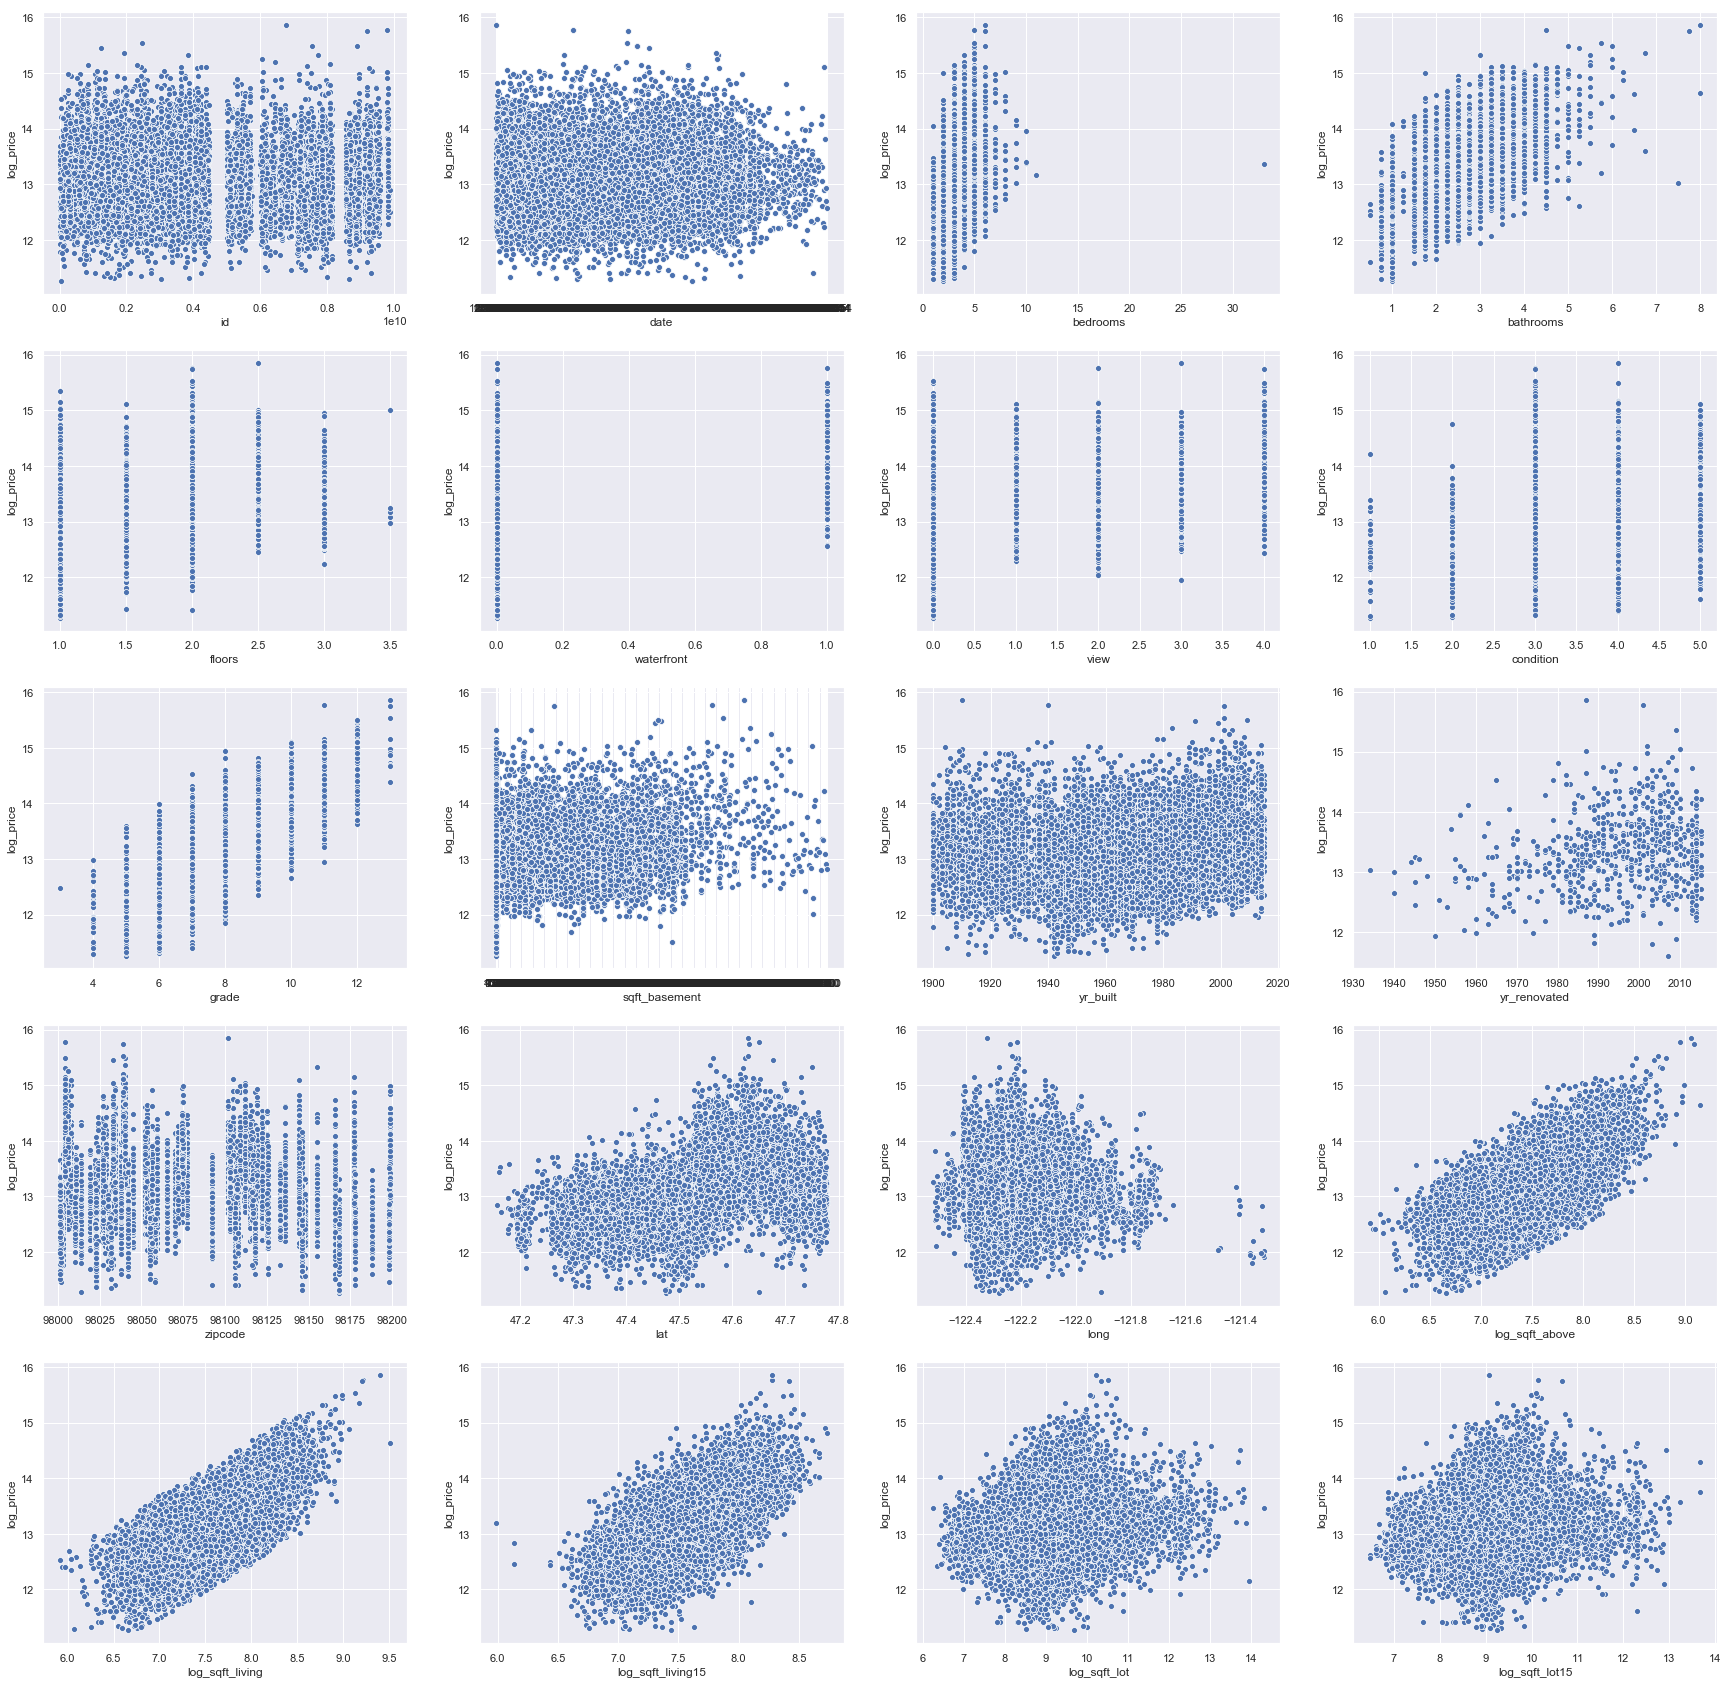

In [10]:
#identify outliers by looking at each indep var vs dep
scatter_one_vs_all(df,'log_price')

In [11]:
# choose bedroom and bathrooms to elim outliers
outliers = ['bedrooms', 'bathrooms','long']
df = remove_outliers(df, outliers)

In [12]:
#function that replaces null values with the mediam
df = replace_null_w_median(['sqft_basement'], df)

0

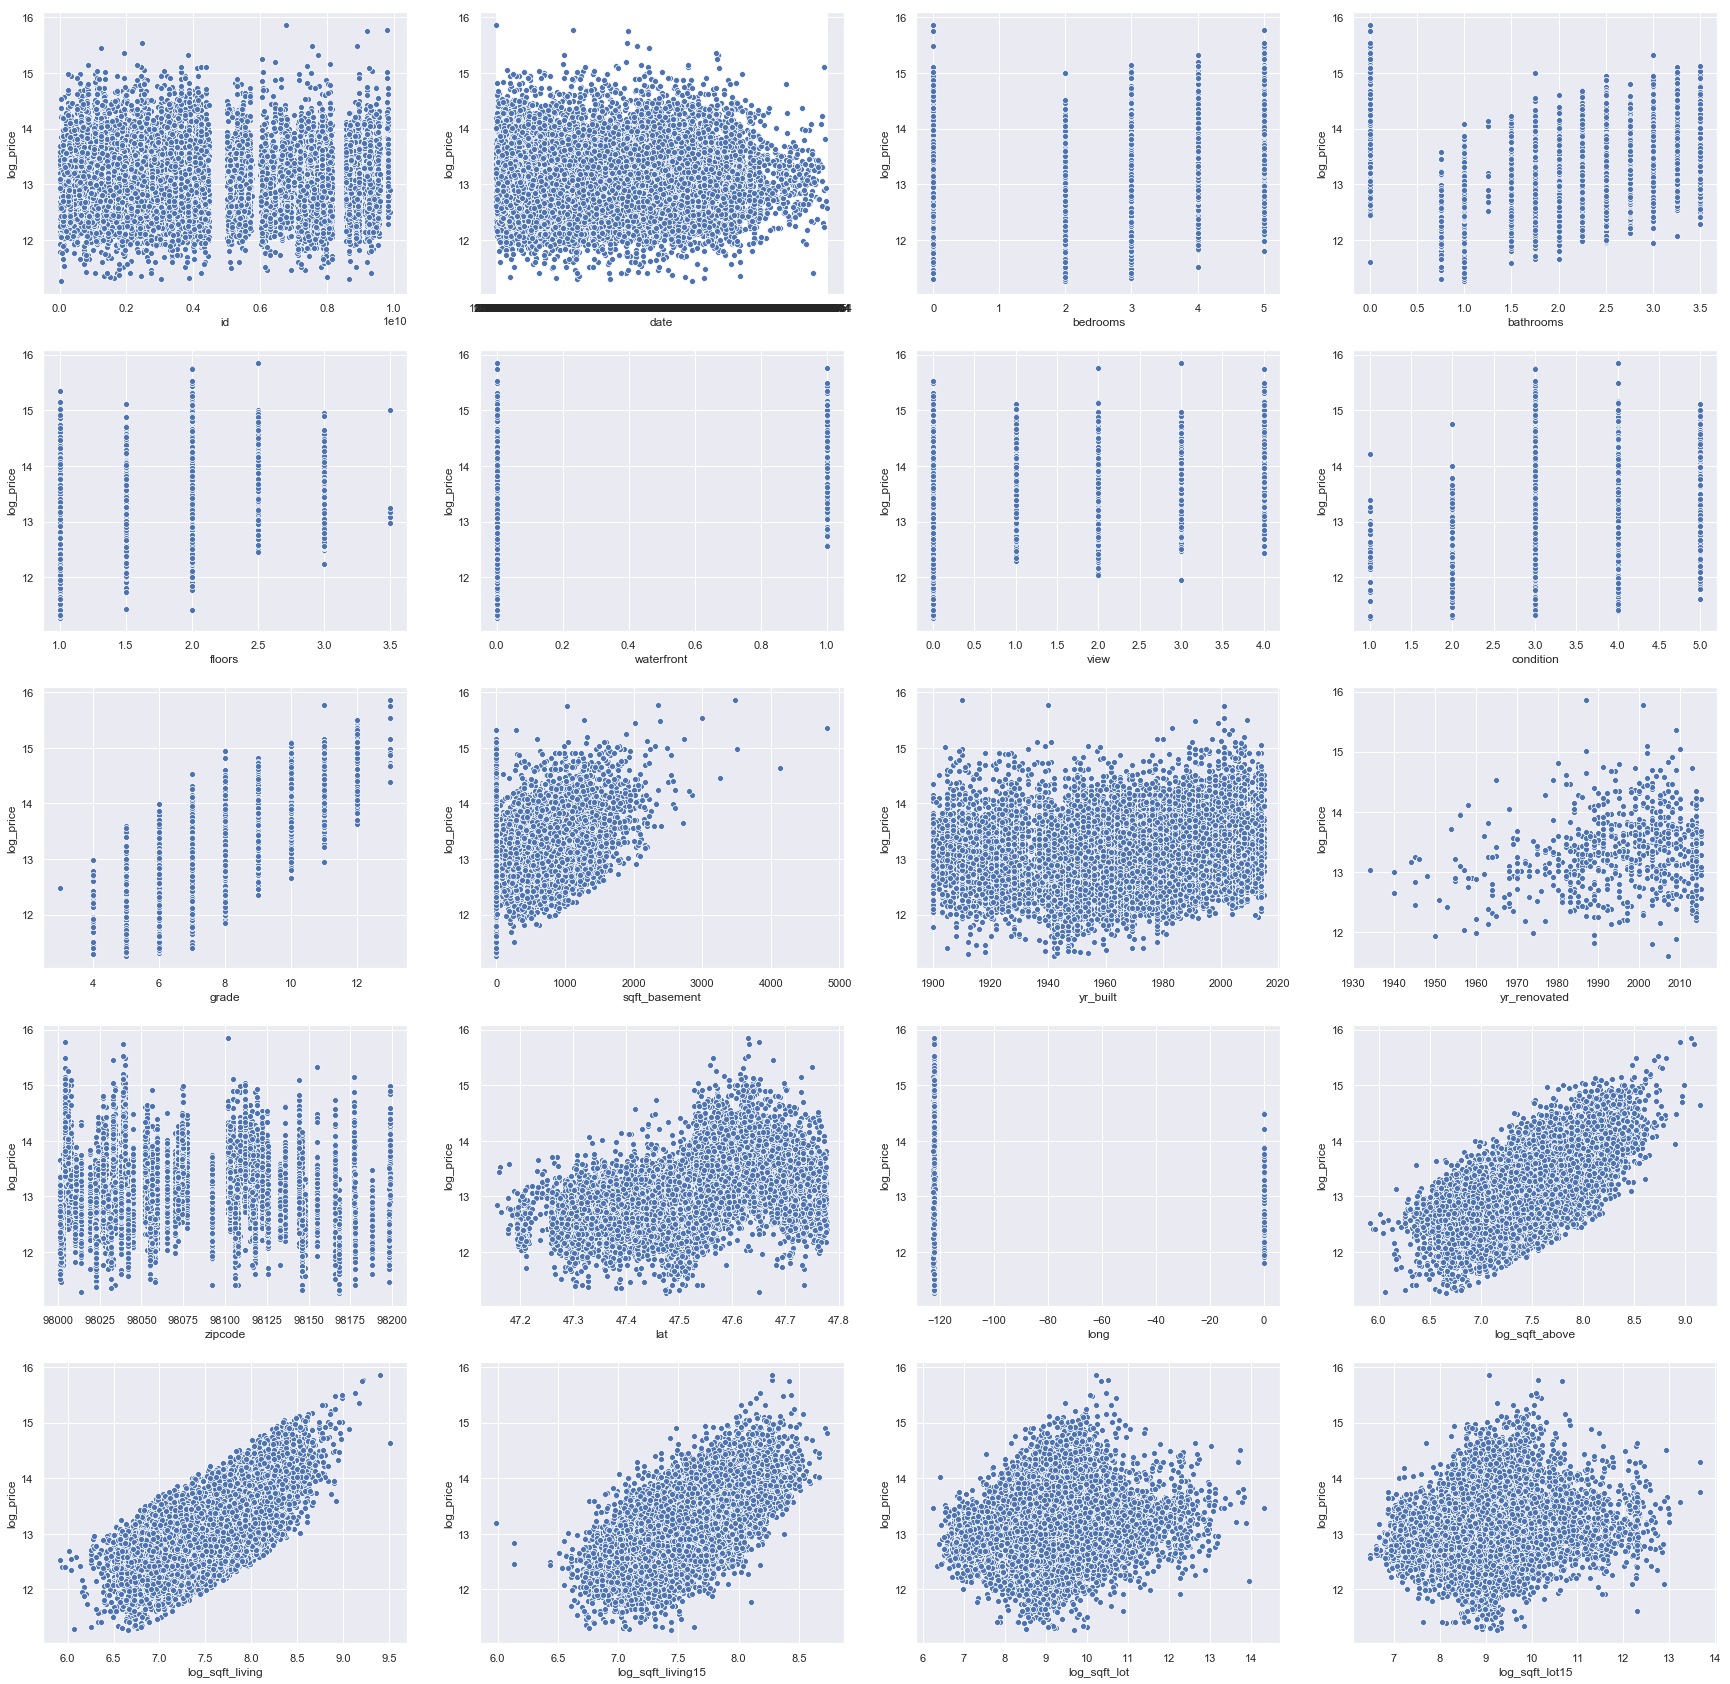

In [13]:
#Scatter fig for all features VS log_prize after outliers cleared
sns.set()
scatter_one_vs_all(df,'log_price')


In [14]:
features = ["log_sqft_living", "waterfront", "grade", "condition", "log_sqft_living15", "view", "yr_built"]

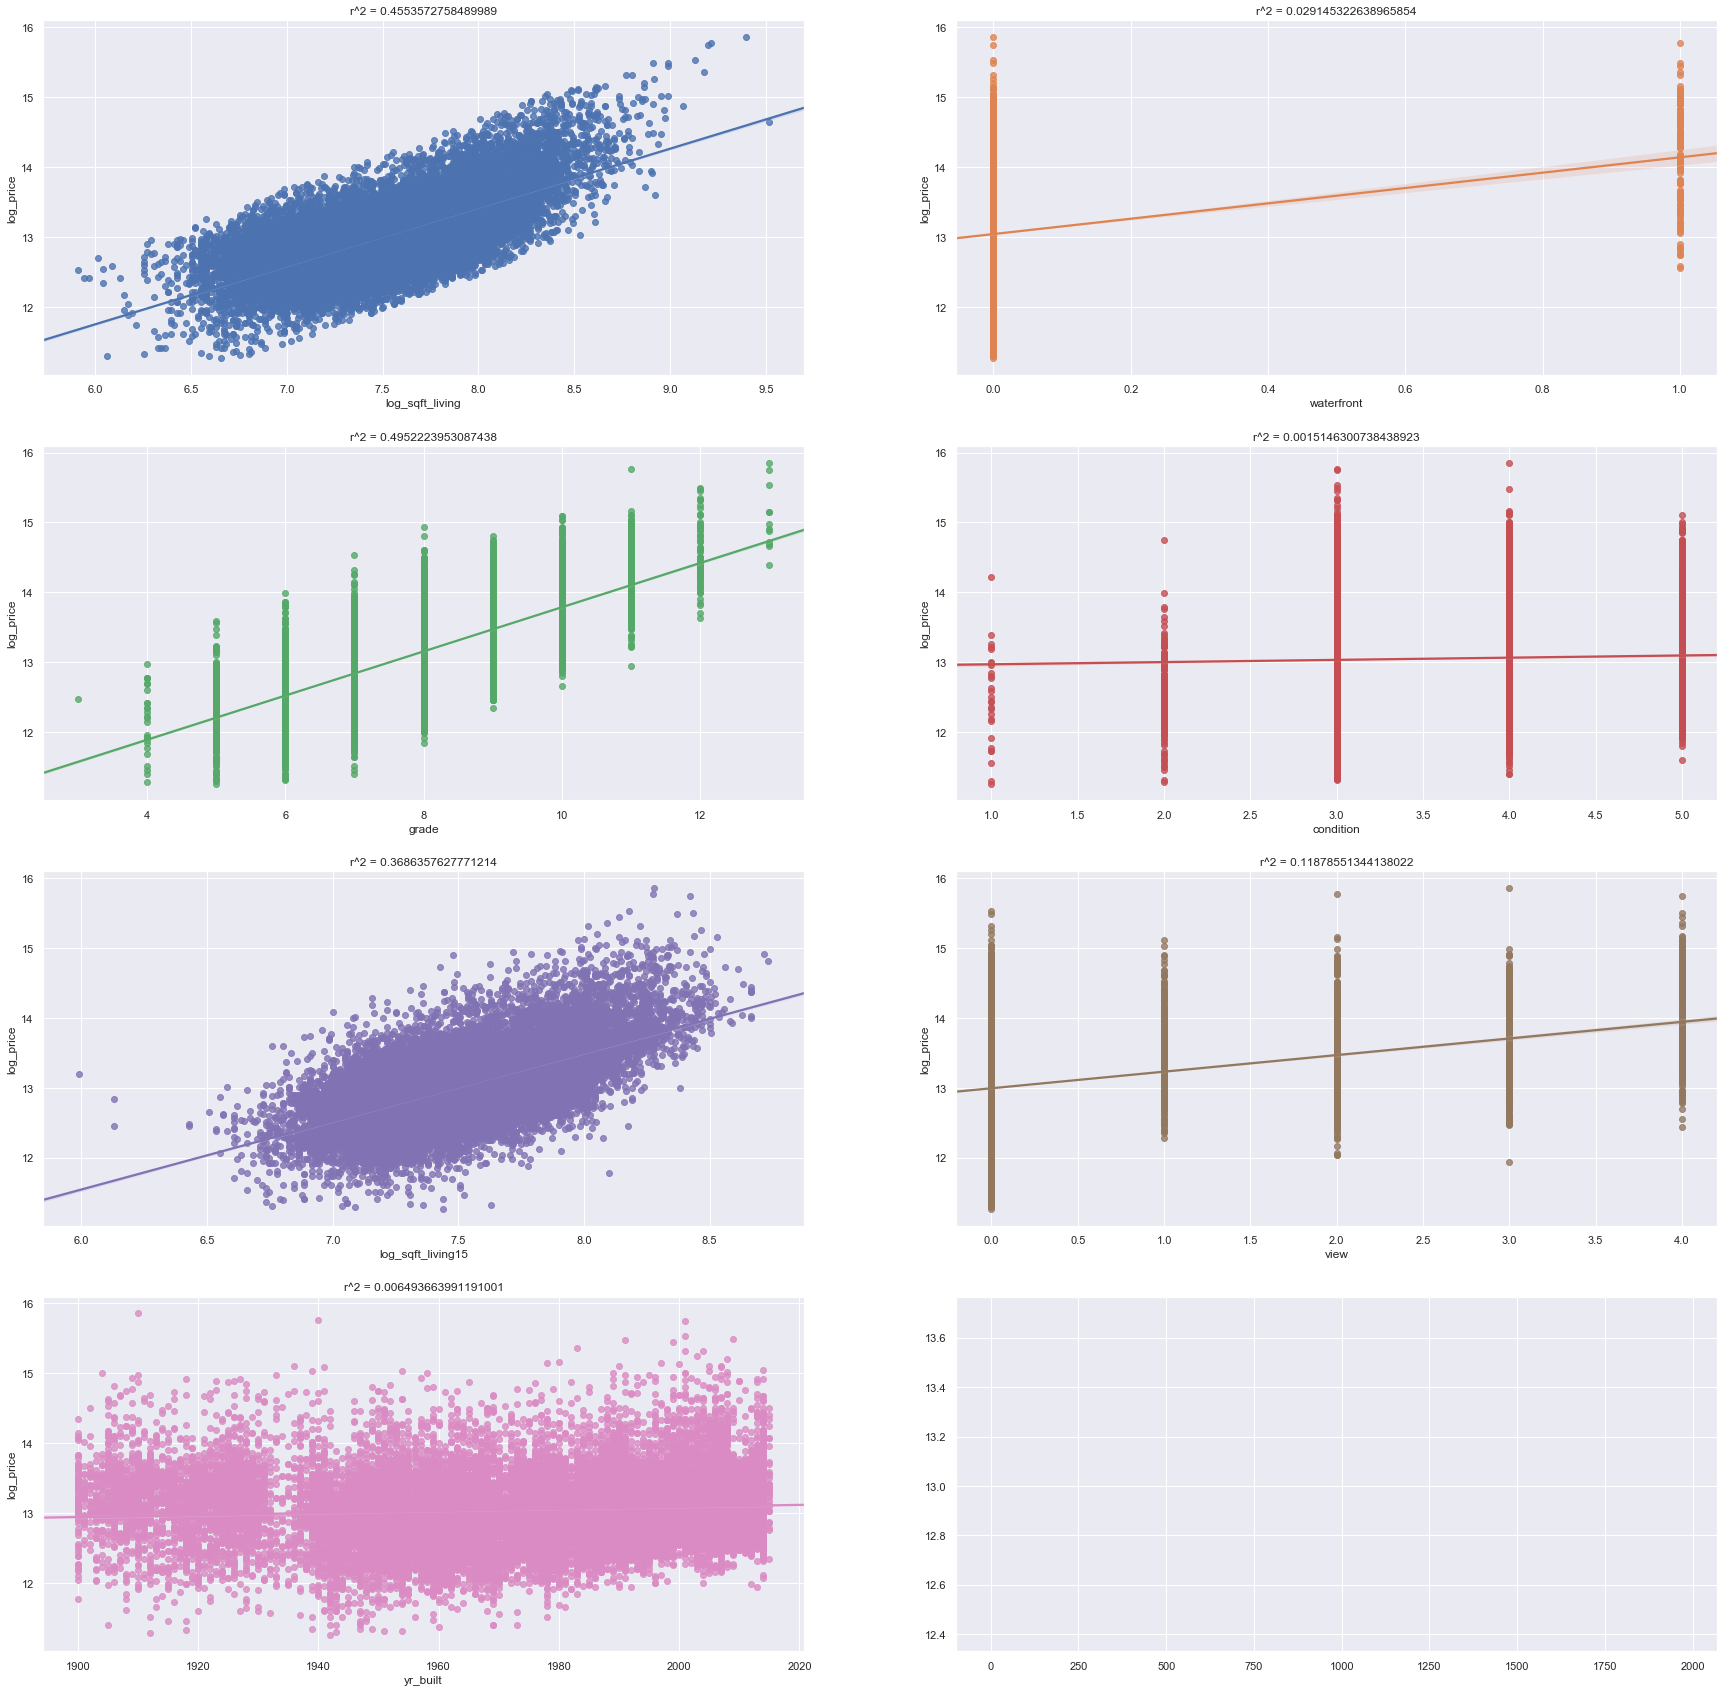

In [14]:
single_regression_plot(df, 'log_price', features)

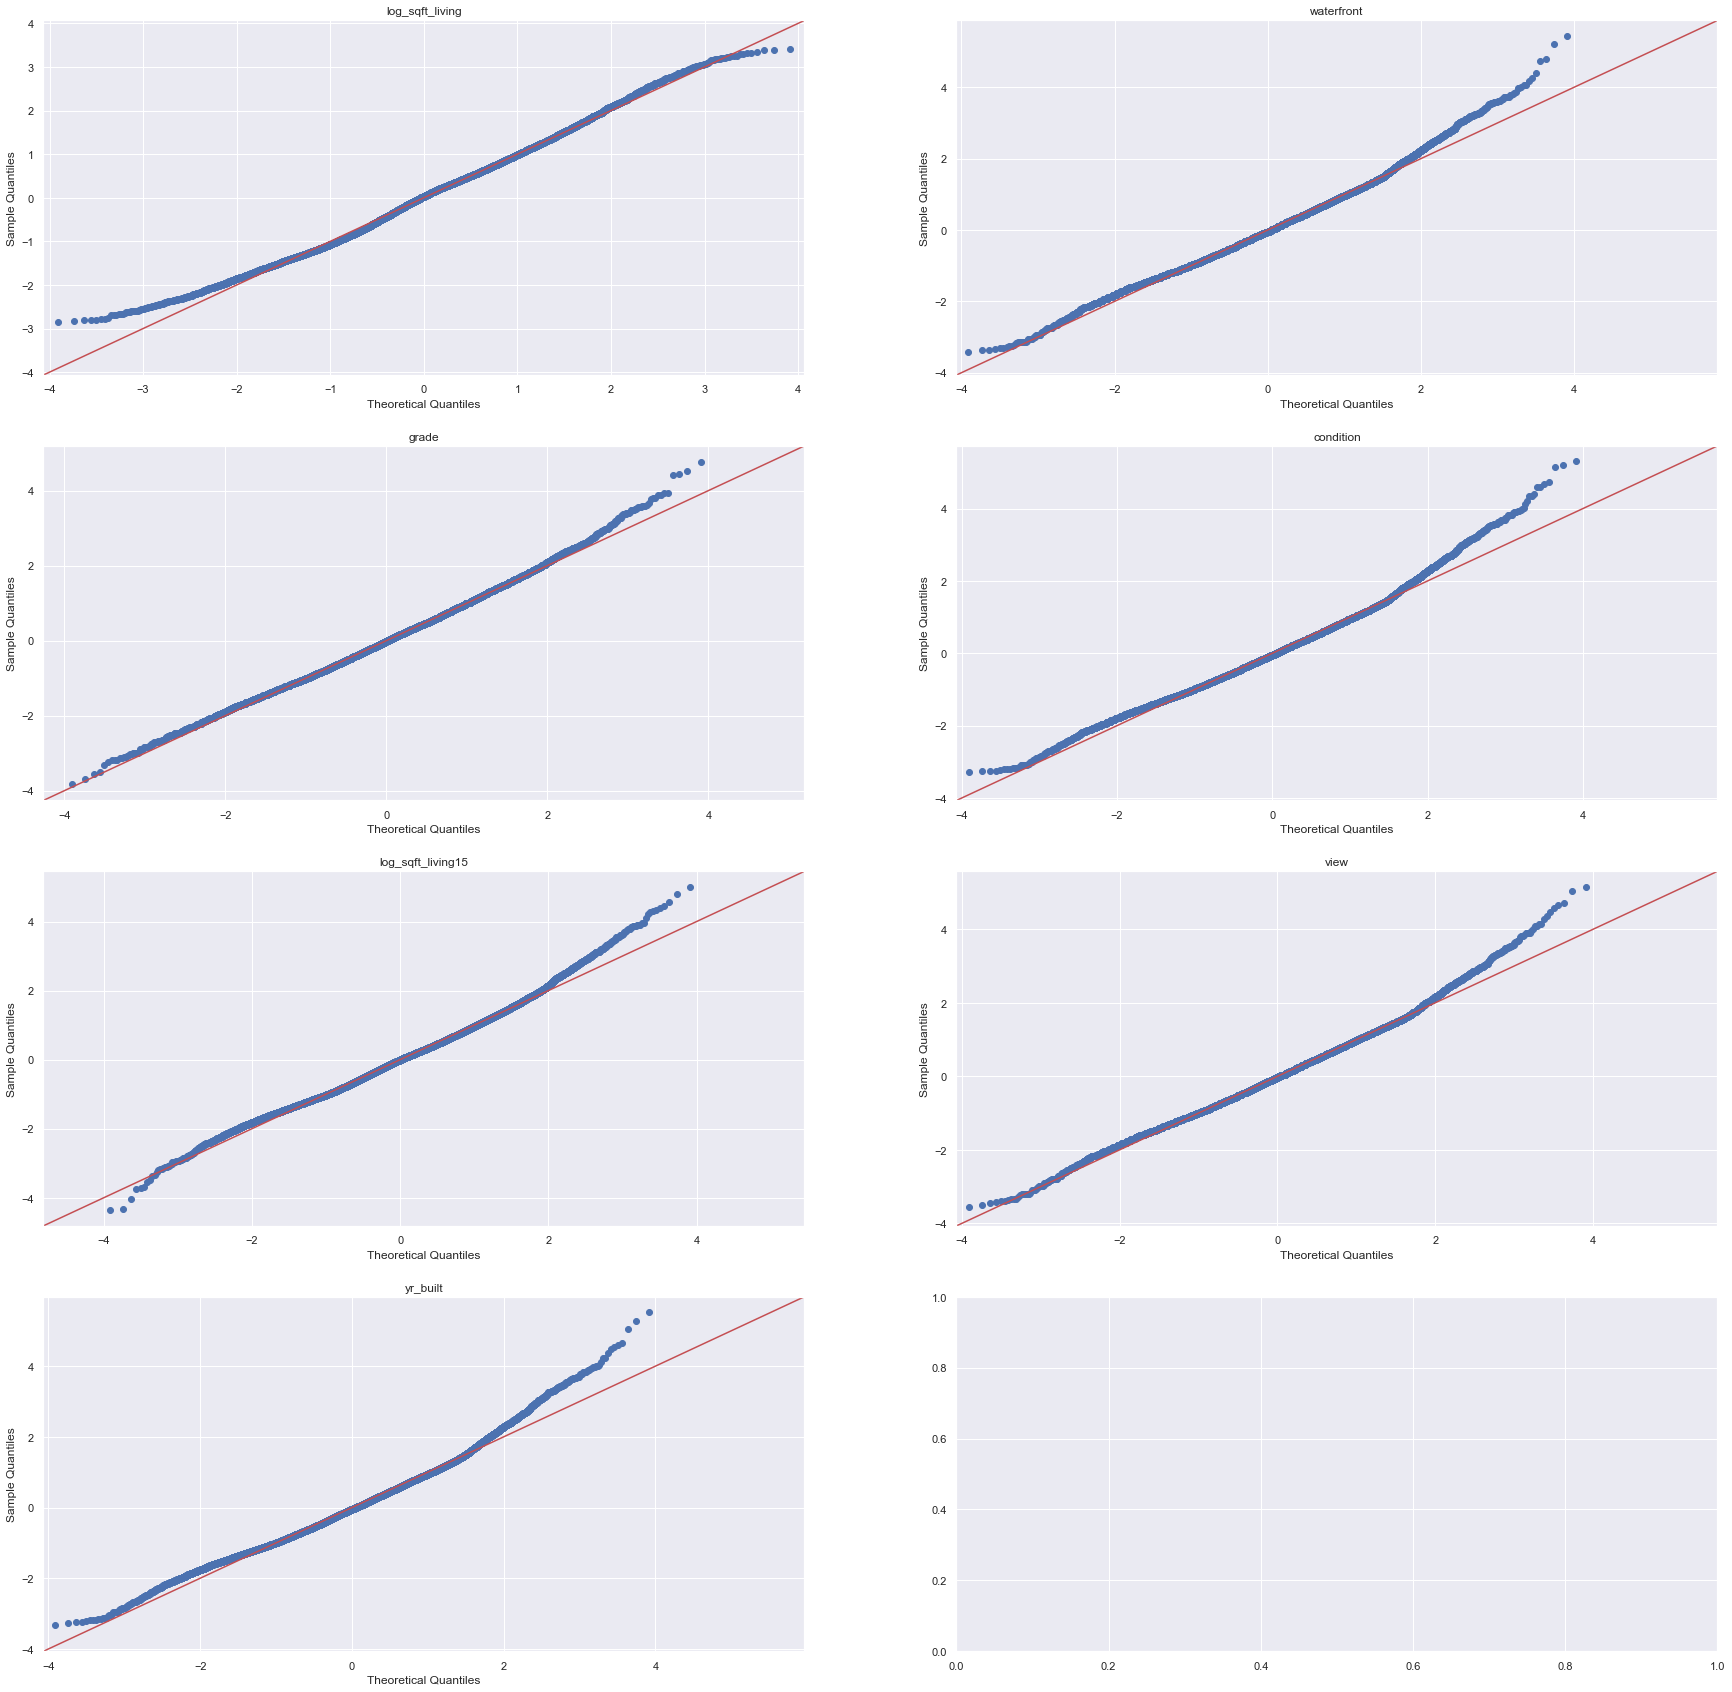

In [15]:
# Fig Normalized between log_price VS features
qq_plot('log_price', features, df)

In [12]:
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [15]:
#function that select feaures for our model
test_predictors(['log_sqft_above', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot', 
                 'log_sqft_lot15', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 
                 'condition', 'grade', 'yr_built', 'zipcode', 
                 'view', 'lat', 'long'], df, 6)

(['log_sqft_above - 7',
  'log_sqft_living - 1',
  'log_sqft_living15 - 1',
  'log_sqft_lot - 4',
  'log_sqft_lot15 - 3',
  'bedrooms - 5',
  'bathrooms - 9',
  'floors - 6',
  'waterfront - 1',
  'condition - 1',
  'grade - 1',
  'yr_built - 8',
  'zipcode - 10',
  'view - 2',
  'lat - 1',
  'long - 11'],
 array([0.36750953, 0.1921478 , 0.71140265, 0.09879474, 0.16401022,
        1.49667922]),
 -63.95530913500441)

In [16]:
create_model(df, features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     5444.
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:25:52   Log-Likelihood:                -5809.1
No. Observations:               21597   AIC:                         1.163e+04
Df Residuals:                   21589   BIC:                         1.170e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7027      0.178     94.017      0.000      16.355      17.051
log_sqft_living       0.3427      0.009     39.261      0.000       0.326       0.360
waterfront            0.3854      0.028     13.547      0.000       0.330       0.441
grade                 0.2364      0.003     78.115      0.000       0.230       0.242
condition             0.0308      0.004      8.618      0.000       0.024       0.038
log_sqft_living15     0.1695      0.010     16.222      0.000       0.149       0.190
view                  0.0545      0.003     16.906      0.000       0.048       0.061
yr_built             -0.0048   8.88e-05    -54.024      0.000      -0.005      -0.005
==============================================================================
Omnibus:                       44.797   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.183
Skew:                          -0.106   Prob(JB):                     1.54e-10
Kurtosis:                       3.070   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# def actual_vs_predicted_df(df):
#     '''makes data frame of actual vs. predicted values and returns the data frame as df_predicted'''
    
#     data = df
#     y = df["log_price"]
#     X = df[["log_sqft_living", "waterfront", "grade", "condition", "log_sqft_living15", "view", "yr_built"]]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)    
    
#     regressor = LinearRegression()  
#     regressor.fit(X_train, y_train)

#     coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#     coeff_df

#     y_pred = regressor.predict(X_test)

#     df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#     return df_predicted


In [17]:
df_predicted = actual_vs_predicted_df(df)


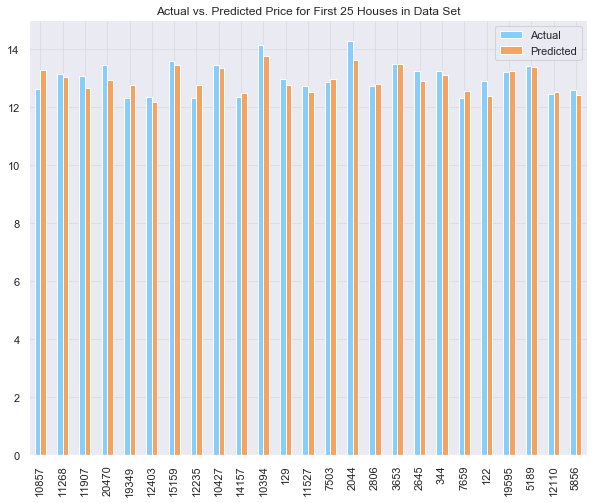

In [18]:
bar_error(df_predicted)


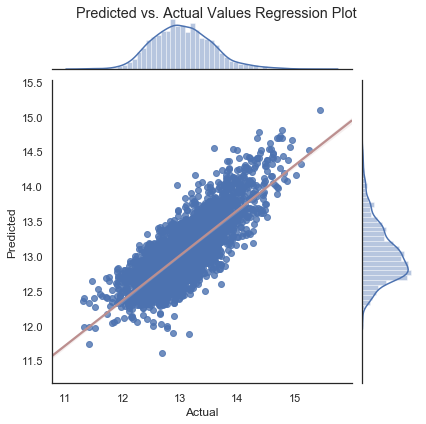

In [19]:
regression_plot(df_predicted)